In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import pywt

In [0]:
def loadImage(image):
  img = cv2.imread(image,0)
  return img

In [0]:
def padding(arr,top,bottom,left,right):
  xlen = arr.shape[0]+2*left
  ylen = arr.shape[1]+2*top
  new = np.zeros([xlen,ylen],dtype=int)
  new[left:arr.shape[0]+left,top:arr.shape[1]+top] = arr
  new1 = np.array(new)
  return new1

In [0]:
def convol(arr,kernel):
  top = bottom = (kernel.shape[1] // 2)
  left = right = (kernel.shape[0] // 2)
  newImg = padding(arr,top,bottom,left,right)
  result = np.zeros_like(newImg)
  offset_x,offset_y = kernel.shape[1],kernel.shape[0]
  for x in range(arr.shape[1]):
    for y in range(arr.shape[0]): 
      result[y, x]=(kernel * newImg[y: y+offset_y, x: x+offset_x]).sum()
      
  return result


In [0]:
def addNoise(arr):
  x,y = arr.shape[0],arr.shape[1]
  noisy = int((x*y) * 0.1)  #10% salt-pepper noise
  #print(noisy)
  f=0;
  for i in range(noisy):
   a = np.random.randint(0,x)
   b = np.random.randint(0,y)
   if(f==0):
     arr[a,b] = 0
     f=1
   else:
     arr[a,b] = 255
     f=0   

  return arr




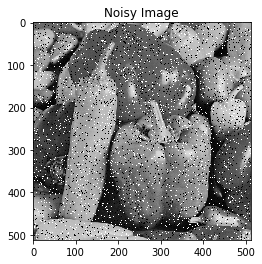

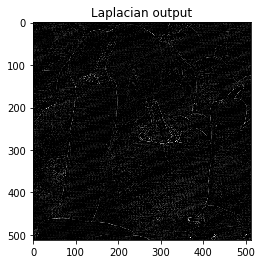

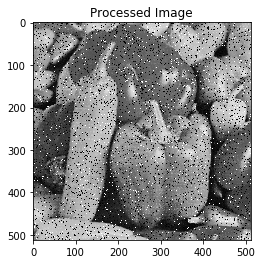

In [71]:
arrImg = loadImage('image_3.png')
lapImg = cv2.Laplacian(arrImg,-1,3)

noiseImg = addNoise(arrImg)

plt.title('Noisy Image')
plt.imshow(noiseImg, cmap='gray')
plt.show()

#laplacian = np.matrix([[1, 1, 1],[1, -8, 1],[1, 1, 1]]) 
#conImg = convol(noiseImg,laplacian)

plt.title('Laplacian output')
plt.imshow(lapImg, cmap='gray')
plt.show()


Img =  noiseImg + lapImg
plt.title('Processed Image')
plt.imshow(Img, cmap='gray')
plt.show()

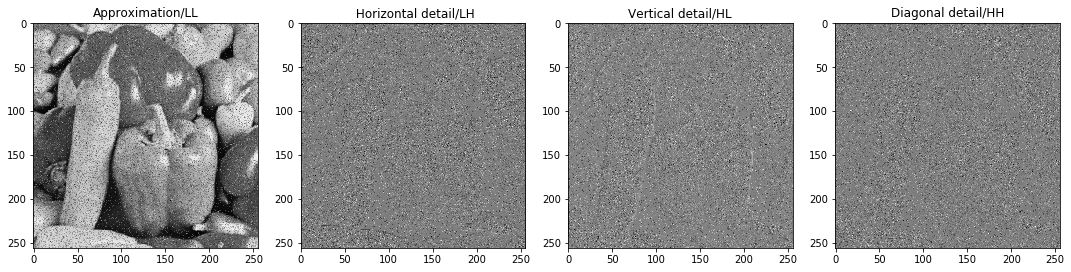

In [72]:
LL, (LH, HL, HH) = pywt.dwt2(Img,'haar')
titles = ['Approximation/LL', ' Horizontal detail/LH', 'Vertical detail/HL', 'Diagonal detail/HH']
fig = plt.figure(figsize=(15,4))
for i, val in enumerate([LL, LH, HL, HH]):
    test = fig.add_subplot(1, 4, i + 1)
    test.imshow(val, cmap='gray')
    test.set_title(titles[i])
fig.tight_layout()
plt.show()

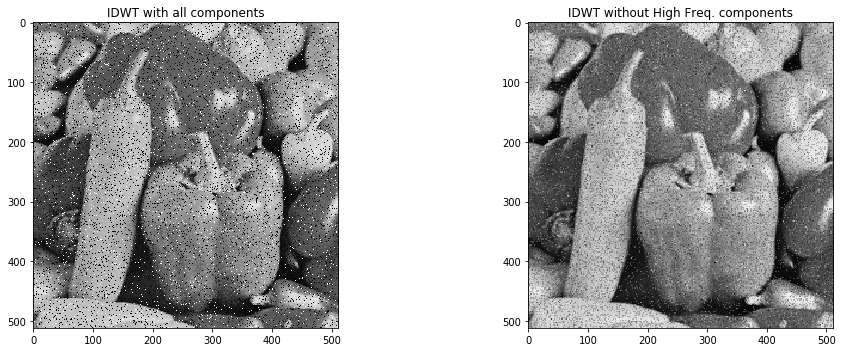

In [73]:
idwt_haar = pywt.idwt2((LL, (LH, HL, HH)),'haar')
idwt_HF = pywt.idwt2((LL, (None, None, None)),'haar')
titles1 = ['IDWT with all components','IDWT without High Freq. components'] 
fig = plt.figure(figsize=(15,5))
for i,val in enumerate([idwt_haar,idwt_HF]):
  test = fig.add_subplot(1,2,i+1)
  test.set_title(titles1[i])
  test.imshow(val, cmap='gray')

fig.tight_layout()
plt.show()



